# 다항회귀분석 연습문제

## #01. 패키지 준비하기

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## #02. 데이터셋 준비하기

In [2]:
origin = read_excel("https://data.hossam.kr/F02/fish2.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


## #03. 데이터 전처리

### 결측치 확인

In [3]:
origin.isnull().sum()

길이    0
높이    0
두께    0
무게    0
dtype: int64

## #04. 탐색적 데이터 분석

### 기본통계 확인

In [4]:
origin.describe()

,길이,높이,두께,무게
count,56.000000,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536,382.239286
std,9.021668,2.878343,1.775006,347.617717
min,8.400000,2.110000,1.410000,5.900000
25%,21.825000,5.690000,3.520000,120.000000
50%,25.300000,6.920000,4.155000,207.500000
75%,36.625000,10.850000,6.450000,692.500000
max,44.000000,12.800000,8.140000,1100.000000


### 산점도 그래프와 추세선 확인

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams['axes.unicode_minus'] = False

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


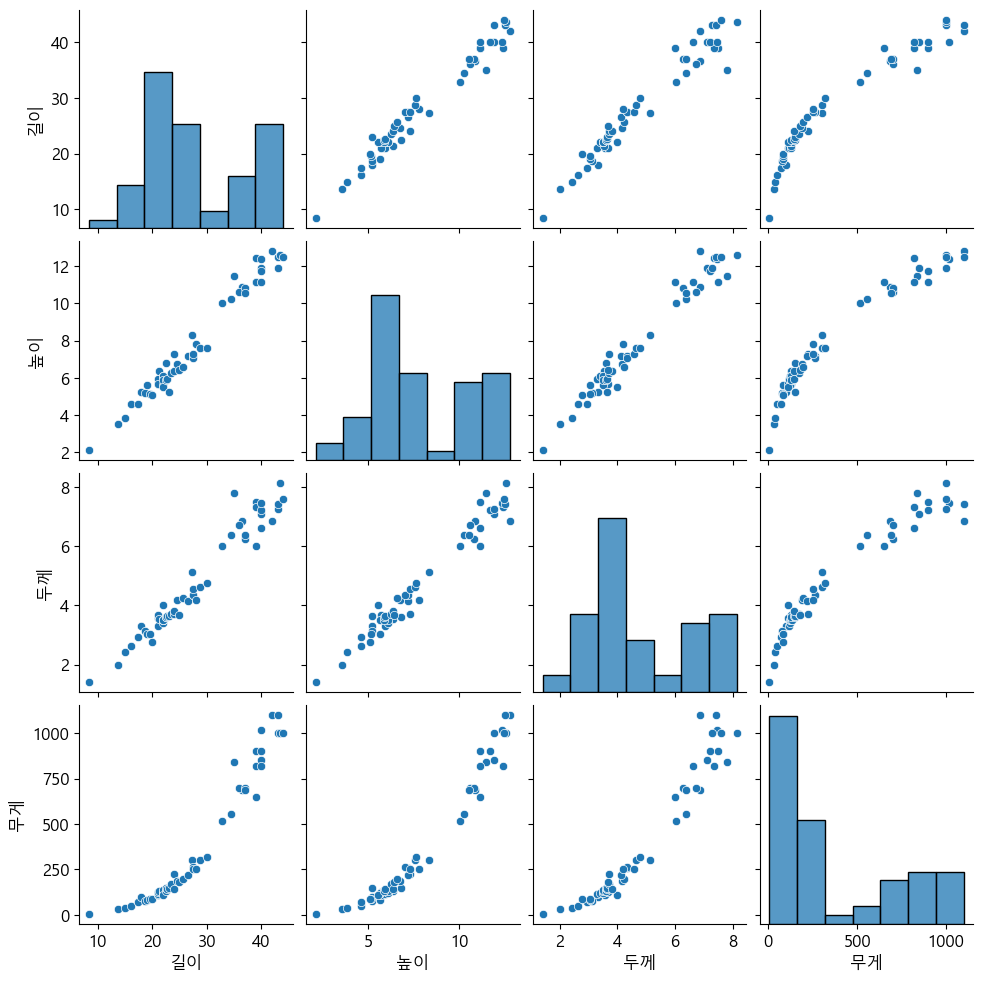

In [6]:
sb.pairplot(origin)
plt.show()
plt.close()

> 다항식이 적합해보인다.

## #05. 데이터셋 분할하기

### 랜덤시드 고정

In [7]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [8]:
x = origin[['길이','높이','두께']]
y = origin[['무게']]
x.shape, y.shape

((56, 3), (56, 1))

### 데이터 표준화

In [9]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(x)

# y_scaler = StandardScaler()
# y_scale = y_scaler.fit_transform(y)

x_scale.shape

(56, 3)

In [10]:
x_scale_df = DataFrame(x_scale, columns=['길이','높이','두께'])
x_scale_df

,길이,높이,두께
0,-2.180225,-2.016507,-1.896175
1,-1.587434,-1.518703,-1.560774
2,-1.442032,-1.417039,-1.316328
3,-1.307815,-1.147103,-1.202633
4,-1.173599,-1.147103,-1.026405
5,-1.106490,-0.926246,-0.810384
6,-1.028197,-0.933258,-0.924079
7,-0.994643,-0.779008,-0.963873
8,-0.927534,-0.954292,-0.969558
9,-0.882795,-0.975326,-1.123046


### 독립변수를 다항식으로 변환

In [11]:
poly = PolynomialFeatures(degree=2, include_bias=False)
fit = poly.fit_transform(x_scale_df)
x2 = DataFrame(fit, columns=poly.get_feature_names_out())
x2.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479
1,-1.587434,-1.518703,-1.560774,2.519946,2.410841,2.477625,2.306460,2.370352,2.436014
2,-1.442032,-1.417039,-1.316328,2.079457,2.043416,1.898188,2.008000,1.865289,1.732721
3,-1.307815,-1.147103,-1.202633,1.710381,1.500199,1.572822,1.315845,1.379544,1.446326
4,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508


### 훈련 데이터와 검증 데이터로 분할

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x2,y,test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 9), (17, 9), (39, 1), (17, 1))

In [13]:
len(x_train.iloc[0])

9

## #06. 모델 개발

### 모델 정의

In [15]:
model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫번째 Dense 층
# input_shape = 독립변수의 갯수 (길이, 높이, 두께) = >3개
model.add(Dense(64, activation = 'relu', input_shape=(len(x_train.iloc[0]), )))

#은닉층
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# 마지막 층
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
 dense_12 (Dense)            (None, 1)                

### 학습하기

In [16]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.001, verbose=1)
])

Epoch 1/500
2/2 [==============================] - 1s 249ms/step - loss: 283199.4375 - mae: 395.4363 - val_loss: 221428.0000 - val_mae: 350.9277 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 48ms/step - loss: 283053.7500 - mae: 395.3260 - val_loss: 221292.9844 - val_mae: 350.8228 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 32ms/step - loss: 282908.9375 - mae: 395.2158 - val_loss: 221158.9531 - val_mae: 350.7208 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 40ms/step - loss: 282765.2188 - mae: 395.1017 - val_loss: 221026.7188 - val_mae: 350.6160 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 32ms/step - loss: 282610.4688 - mae: 394.9781 - val_loss: 220884.9531 - val_mae: 350.4964 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 40ms/step - loss: 282452.0000 - mae: 394.8448 - val_loss: 220739.8594 - val_mae: 350.3686 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 32m

## #07. 학습 결과 평가

In [17]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,283199.437500,395.436340,221428.000000,350.927673,0.001
2,283053.750000,395.325958,221292.984375,350.822815,0.001
3,282908.937500,395.215790,221158.953125,350.720795,0.001
4,282765.218750,395.101654,221026.718750,350.616028,0.001
5,282610.468750,394.978119,220884.953125,350.496399,0.001
...,...,...,...,...,...
144,3307.614746,41.125786,5656.209961,40.532654,0.001
145,3315.538574,40.171955,5960.871094,41.295883,0.001
146,3323.729492,40.115303,6077.139160,41.385628,0.001


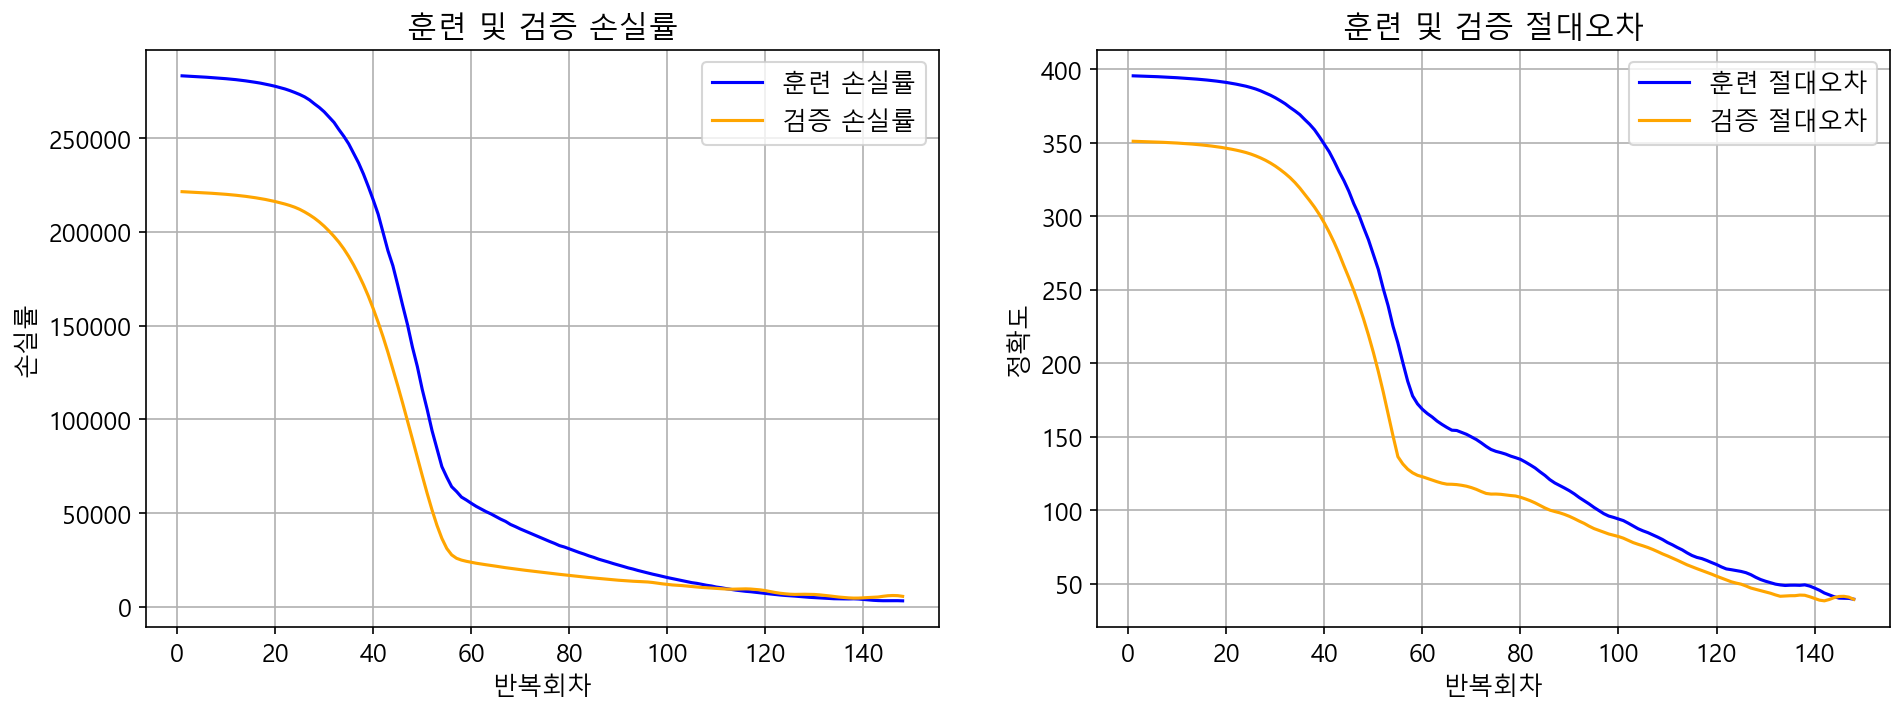

In [18]:
# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [19]:
evaluate1 = model.evaluate(x_train, y_train)
print('최종 훈련 손실률 : %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))
evaluate2 = model.evaluate(x_test, y_test)
print('최종 훈련 손실률 : %f, 최종 훈련 절대오차: %f' % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 28ms/step - loss: 3109.7959 - mae: 38.2298
최종 훈련 손실률 : 3109.795898, 최종 훈련 절대오차: 38.229832
1/1 [==============================] - 0s 24ms/step - loss: 5634.2188 - mae: 39.3196
최종 훈련 손실률 : 5634.218750, 최종 훈련 절대오차: 39.319645


## #08. 학습 결과 적용

### 테스트 데이터에 대한 예측 결과 산정

In [20]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

1/1 [==============================] - 0s 24ms/step


### 결과 데이터 셋 구성

In [21]:
x2.columns

Index(['길이', '높이', '두께', '길이^2', '길이 높이', '길이 두께', '높이^2', '높이 두께', '두께^2'], dtype='object')

In [22]:
train_df = DataFrame(x_train, columns=x2.columns)
train_df['무게(관측치)'] = y_train['무게']
train_df['무게(예측치)'] = train_pred.flatten()

train_df['훈련오차'] = train_df['무게(관측치)'] - train_df['무게(예측치)']

train_df.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게(관측치),무게(예측치),훈련오차
8,-0.927534,-0.954292,-0.969558,0.860320,0.885138,0.899298,0.910672,0.925241,0.940042,85.0,91.799164,-6.799164
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479,5.9,119.717621,-113.817621
15,-0.659101,-0.779008,-0.696689,0.434414,0.513445,0.459188,0.606854,0.542726,0.485375,120.0,140.854111,-20.854111
26,-0.368297,-0.396891,-0.327179,0.135643,0.146174,0.120499,0.157523,0.129854,0.107046,188.0,178.429871,9.570129
51,1.577847,1.731046,1.207709,2.489601,2.731326,1.905580,2.996521,2.090600,1.458561,1100.0,995.255249,104.744751


In [23]:
test_df = DataFrame(x_test, columns=x2.columns)
test_df['무게(관측치)'] = y_test['무게']
test_df['무게(예측치)'] = test_pred.flatten()

test_df['훈련오차'] = test_df['무게(관측치)'] - test_df['무게(예측치)']

test_df.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게(관측치),무게(예측치),훈련오차
16,-0.659101,-0.614242,-0.696689,0.434414,0.404847,0.459188,0.377294,0.427936,0.485375,130.0,144.018509,-14.018509
12,-0.770948,-0.761480,-0.611417,0.594361,0.587062,0.471371,0.579852,0.465582,0.373831,125.0,129.026810,-4.026810
21,-0.580807,-0.670333,-0.634156,0.337337,0.389334,0.368323,0.449346,0.425096,0.402154,145.0,152.521011,-7.521011
33,-0.043940,-0.204080,-0.099788,0.001931,0.008967,0.004385,0.041649,0.020365,0.009958,250.0,214.828873,35.171127
36,0.235678,-0.084887,0.013907,0.055544,-0.020006,0.003278,0.007206,-0.001181,0.000193,320.0,242.753830,77.246170


### 실제 결과값과 머신러닝에 의한 예측값 비교

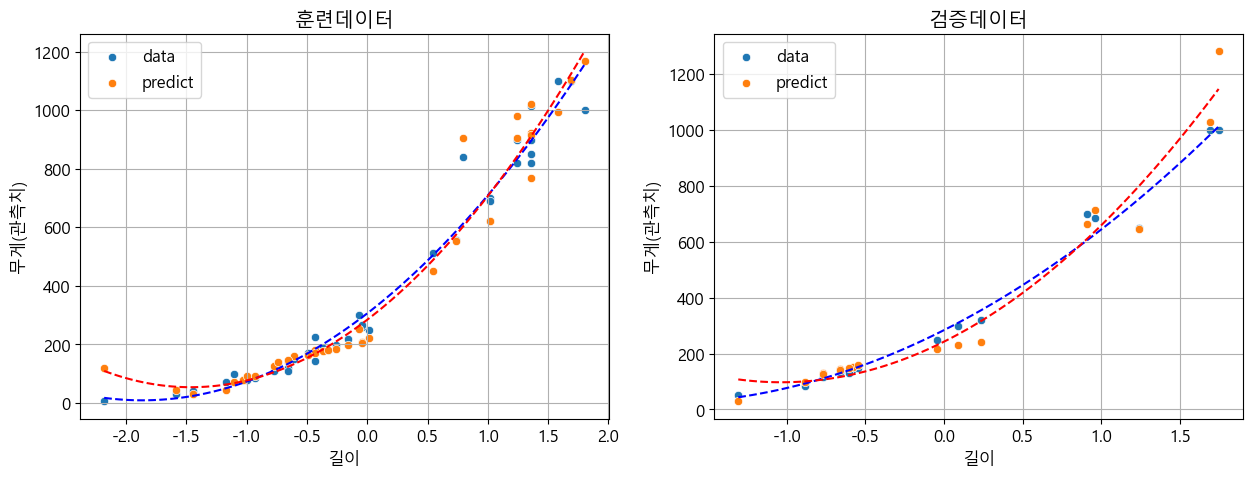

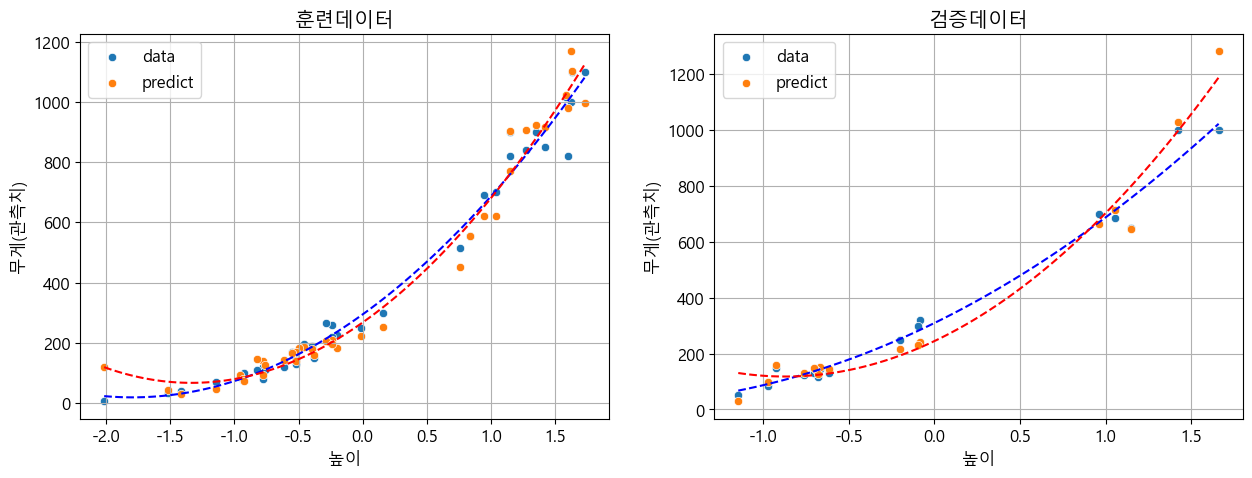

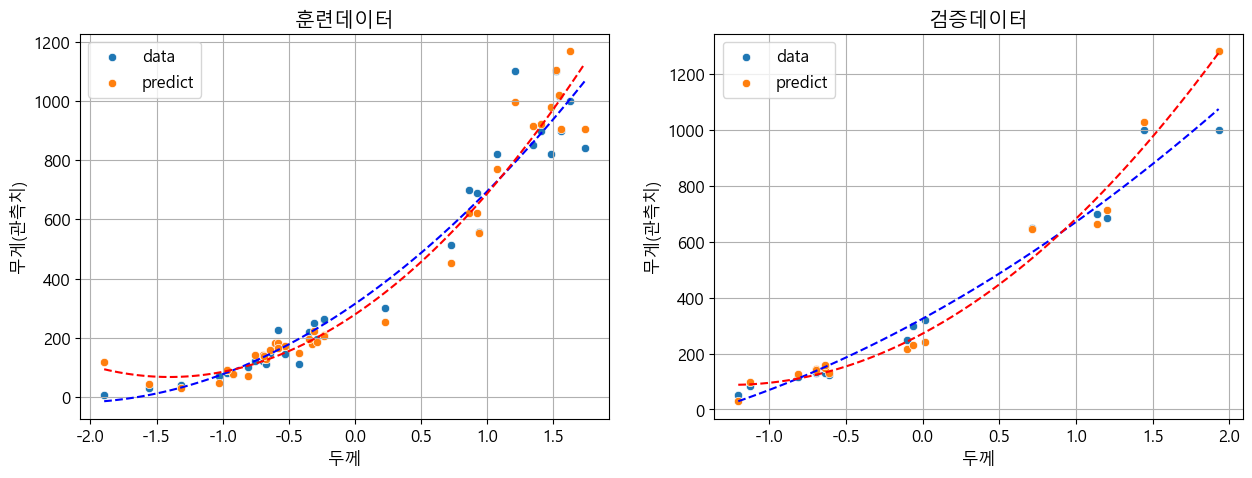

In [24]:
for key in ['길이','높이','두께']:
    helper.regplot(train_df[key], train_df['무게(관측치)'], train_df['무게(예측치)'], "훈련데이터",
                   test_df[key], test_df['무게(관측치)'], test_df['무게(예측치)'], "검증데이터",
                   figsize=(15, 5))


> 표준화 후 다항회귀분석을 하는 것이 더 결과가 좋은 것을 알 수 있다.